<a href="https://colab.research.google.com/github/niandrazhee/TimeSeries_AnalistVisualiztion/blob/main/18_Niandra_Zhenia_Amelia_Time_Series_Analist_(Visualization_in_Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

In [2]:
!pip install numpy

In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [24]:
# reading the dataset using read_csv
df = pd.read_csv("Covid19_Country.csv",
				parse_dates=True,
				index_col="ObservationDate")

# displaying the first five rows of dataset
df.head(20)


,Unnamed: 0,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
ObservationDate,,,,,,,,,,,
2020-02-28,1063,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0
2020-03-10,2055,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0
2020-02-24,869,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
2020-02-25,909,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
2020-02-26,955,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
2020-02-27,1006,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
2020-02-28,1064,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
2020-02-29,1125,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
2020-03-01,1201,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


In [28]:
#Hapus semua baris yang mengandung nilai kosong
df_filtered = df.dropna()

#Tampilkan DataFrame yang sudah difilter
df_filtered.head()

,Unnamed: 0,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
ObservationDate,,,,,,,,,,,
2020-02-24,869,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
2020-02-25,909,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
2020-02-26,955,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
2020-02-27,1006,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
2020-02-28,1064,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


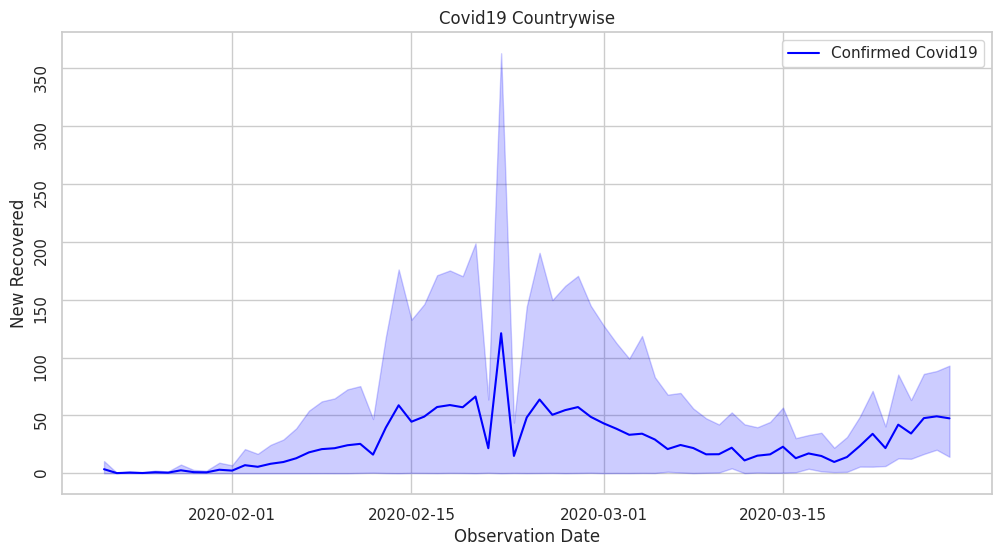

In [72]:
# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df, x='ObservationDate', y='New Recovered', label='Confirmed Covid19', color='blue')

# Adding labels and title
plt.xlabel('Observation Date')
plt.ylabel('New Recovered')
plt.title('Covid19 Countrywise')

# Rotate x-axis labels for better visibility
plt.yticks(rotation=90, ha='right')  # Rotated labels and adjusted horizontal alignment

plt.show()

<ipython-input-61-53563a0b909d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('M').mean() # Resampling to monthly frequency, using mean as an aggregation function


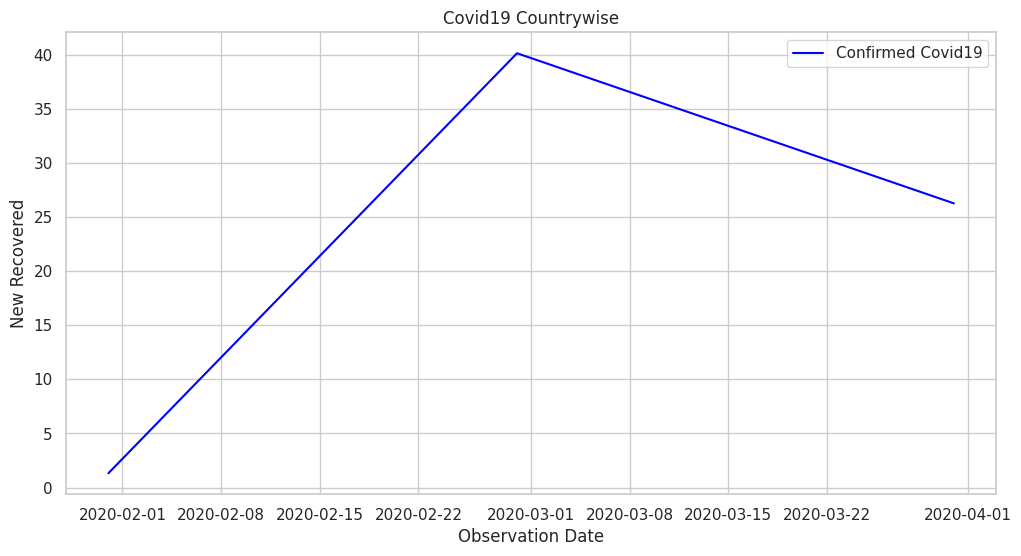

In [61]:
# Assuming df is your DataFrame with a datetime index
df_resampled = df.resample('M').mean() # Resampling to monthly frequency, using mean as an aggregation function

sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df_resampled, x=df_resampled.index, y='New Recovered', label='Confirmed Covid19', color='blue')

# Adding labels and title
plt.xlabel('Observation Date')
plt.ylabel('New Recovered')
plt.title('Covid19 Countrywise')

plt.show()


<Figure size 1200x600 with 0 Axes>

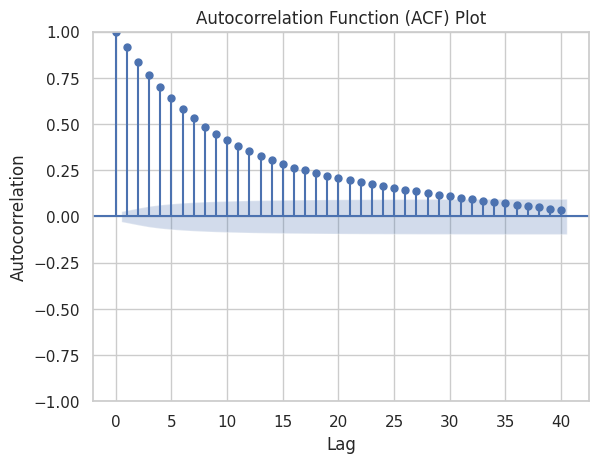

In [43]:
# # If 'Date' is a column, but not the index, you can set it as the index
# df.set_index('ObservationDate', inplace=True)

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Deaths'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()


In [62]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['New Recovered'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -9.914643418801663
p-value: 3.103240737857441e-17
Critical Values: {'1%': -3.4316698889560326, '5%': -2.8621232470799196, '10%': -2.5670804633192237}


In [67]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([df['New Recovered'], df['New Recovered_diff']], axis=1)

# Display the combined DataFrame
print(df_combined.head())


                 New Recovered  New Recovered_diff
ObservationDate                                   
2020-02-28                   0                 NaN
2020-03-10                   0                 0.0
2020-02-24                   0                 0.0
2020-02-25                   0                 0.0
2020-02-26                   0                 0.0


In [68]:
# Remove rows with missing values
df.dropna(subset=['New Recovered_diff'], inplace=True)
df['New Recovered_diff'].head()

ObservationDate
2020-03-10    0.0
2020-02-24    0.0
2020-02-25    0.0
2020-02-26    0.0
2020-02-27    0.0
Name: New Recovered_diff, dtype: float64

In [69]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['New Recovered_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -24.295751216355193
p-value: 0.0
Critical Values: {'1%': -3.431669090222372, '5%': -2.8621228942049535, '10%': -2.567080275469888}
